In [1]:
# Compare INCITE and CERES
import cartopy.crs as ccrs
from math import cos, asin, sqrt
import matplotlib.pyplot as plt
import numpy as np
import pickle
import xarray as xr
import netCDF4 as nc
from mpl_toolkits.basemap import Basemap
from matplotlib import ticker, cm
import matplotlib.tri as tri
import sys
sys.setrecursionlimit(9000)

In [2]:
# Change this part
sYear  = 2008
sMonth = 10
sDay   = 1
sHour  = 0
eYear  = 2008
eMonth = 10
eDay   = 5
eHour  = 0
INCITE_Case = 'NXY_32x1.DX_1600.L_125_115.DT_2e0'
INCITE_Case2 = 'NXY_32x1.DX_200.L_125_115.DT_5e-1'

In [5]:
# Walter's INCITE runs
Date  = str(sYear)+'-'+str("{0:0=2d}".format(sMonth))+'-'+str("{0:0=2d}".format(sDay))+'-'+str("{0:0=5d}".format(sHour))
Date3 = str(sYear)+'-'+str("{0:0=2d}".format(sMonth))+'-'
PATH3 = '/scratch1/07088/tg863871/INCITE2020/INCITE2020.HC.GNUGPU.ne45pg2_r05_oECv3.F-MMFXX.'+INCITE_Case+'.2008-10-01/'
FNAME3 = 'INCITE2020.HC.GNUGPU.ne45pg2_r05_oECv3.F-MMFXX.'+INCITE_Case+'.2008-10-01.eam.h1.'+Date3+'-00000.remap_180x360.nc'
PATH4 = '/scratch1/07088/tg863871/INCITE2020/INCITE2020.HC.GNUGPU.ne45pg2_r05_oECv3.F-MMFXX.'+INCITE_Case2+'.2008-10-01/'
FNAME4 = 'INCITE2020.HC.GNUGPU.ne45pg2_r05_oECv3.F-MMFXX.'+INCITE_Case2+'.2008-10-01.eam.h1.'+Date3+'-00000.remap_180x360.nc'
files3 = xr.open_mfdataset(PATH3+'INCITE2020.HC.GNUGPU.ne45pg2_r05_oECv3.F-MMFXX.'+INCITE_Case+'.2008-10-01.eam.h1.'+Date3+'*-00000.remap_180x360.nc')
files4 = xr.open_mfdataset(PATH4+'INCITE2020.HC.GNUGPU.ne45pg2_r05_oECv3.F-MMFXX.'+INCITE_Case2+'.2008-10-01.eam.h1.'+Date3+'*-00000.remap_180x360.nc')
# CERES data
PATH_CERES = '/scratch1/07088/tg863871/CERES/'
FNAME_CERES = 'CERES_SYN1deg-Day_Terra-Aqua-MODIS_Ed4.1_Subset_20081001-20081130.nc'
FILE_CERES = nc.Dataset(PATH_CERES+FNAME_CERES, mode = 'r')

In [6]:
# Read coordinates
lon_CERES  = FILE_CERES.variables['lon'] # 360
lat_CERES  = FILE_CERES.variables['lat'] # 180
lon_INCITE = files4.lon.values # 360
lat_INCITE = files4.lat.values # 180
lon_INCITE.shape

(360,)

In [11]:
# Read data
FLUT3 = np.squeeze(files3.FLUT.values) # (72, 180, 360)
FLUT4 = np.squeeze(files4.FLUT.values)
FSNTOA3 = np.squeeze(files3.FSNTOA.values) # (72, 180, 360)
FSNTOA4 = np.squeeze(files4.FSNTOA.values)
FILE_CERES = nc.Dataset(PATH_CERES+FNAME_CERES, mode = 'r')
toa_sw_all_daily = FILE_CERES.variables['toa_sw_all_daily']
toa_lw_all_daily = FILE_CERES.variables['toa_lw_all_daily']
toa_solar_all_daily = FILE_CERES.variables['toa_solar_all_daily']
fsntoa_obs      = toa_solar_all_daily[sDay-1:eDay-1,:,:]-toa_sw_all_daily[sDay-1:eDay-1,:,:]
toa_lw_obs      = toa_lw_all_daily[sDay-1:eDay-1,:,:] # (4, 180, 360)
fsntoa_obs_mean = np.mean(fsntoa_obs, axis=0) # (180, 360)
toa_lw_obs_mean = np.mean(toa_lw_obs, axis=0)
FLUT3_mean = np.mean(FLUT3, axis=0) # (180, 360)
FLUT4_mean = np.mean(FLUT4, axis=0)
FSNTOA3_mean = np.mean(FSNTOA3, axis=0)
FSNTOA4_mean = np.mean(FSNTOA4, axis=0)

/home1/07088/tg863871/anaconda3/envs/Griffin_cpu/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: WARNING: valid_min not used since it
cannot be safely cast to variable data type
  # Remove the CWD from sys.path while we load stuff.
/home1/07088/tg863871/anaconda3/envs/Griffin_cpu/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: WARNING: valid_max not used since it
cannot be safely cast to variable data type
  # Remove the CWD from sys.path while we load stuff.
/home1/07088/tg863871/anaconda3/envs/Griffin_cpu/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: WARNING: valid_min not used since it
cannot be safely cast to variable data type
  # This is added back by InteractiveShellApp.init_path()
/home1/07088/tg863871/anaconda3/envs/Griffin_cpu/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: WARNING: valid_max not used since it
cannot be safely cast to variable data type
  # This is added back by InteractiveShellApp.

(180, 360)

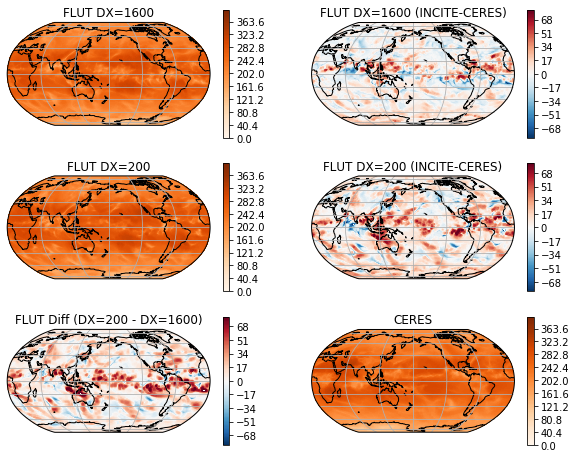

In [13]:
# Compare the FLUT
xi = lon_CERES[:]
yi = lat_CERES[:]
#-- create figure and axes object
fig = plt.figure(figsize=(10,8))
levels = np.linspace(0, 400, 100)
levels2 = np.linspace(-80.0, 80.0, 161)

#-- add coastlines, country border lines, and grid lines
ax1 = fig.add_subplot(3,2,1, projection=ccrs.Robinson(central_longitude=180.0))
#-- choose map projection
ax1.set_global()
ax1.coastlines()
ax1.gridlines()
cntr1=ax1.contourf(xi, yi, FLUT3_mean, levels=levels, cmap="Oranges",transform=ccrs.PlateCarree(central_longitude=180.0))
fig.colorbar(cntr1, ax=ax1)
ax1.set_title('FLUT DX=1600')
ax12 = fig.add_subplot(3,2,2, projection=ccrs.Robinson(central_longitude=180.0))
ax12.coastlines()
ax12.gridlines()
cntr12=ax12.contourf(xi, yi, FLUT3_mean-toa_lw_obs_mean, levels=levels2, cmap="RdBu_r",transform=ccrs.PlateCarree(central_longitude=180.0))
fig.colorbar(cntr12, ax=ax12)
ax12.set_title('FLUT DX=1600 (INCITE-CERES)')
ax2 = fig.add_subplot(3,2,3, projection=ccrs.Robinson(central_longitude=180.0))
ax2.set_global()
#-- add coastlines, country border lines, and grid lines
ax2.coastlines()
ax2.gridlines()
cntr2=ax2.contourf(xi, yi, FLUT4_mean, levels=levels, cmap="Oranges",transform=ccrs.PlateCarree(central_longitude=180.0))
fig.colorbar(cntr2, ax=ax2)
ax2.set_title('FLUT DX=200')
ax22 = fig.add_subplot(3,2,4, projection=ccrs.Robinson(central_longitude=180.0))
ax22.coastlines()
ax22.gridlines()
cntr22=ax22.contourf(xi, yi, FLUT4_mean-toa_lw_obs_mean, levels=levels2, cmap="RdBu_r",transform=ccrs.PlateCarree(central_longitude=180.0))
fig.colorbar(cntr22, ax=ax22)
ax22.set_title('FLUT DX=200 (INCITE-CERES)')
ax3 = fig.add_subplot(3,2,5, projection=ccrs.Robinson(central_longitude=180.0))
ax3.set_global()
#-- add coastlines, country border lines, and grid lines
ax3.coastlines()
ax3.gridlines()
cntr3=ax3.contourf(xi, yi, FLUT4_mean-FLUT3_mean, levels=levels2, cmap="RdBu_r",transform=ccrs.PlateCarree(central_longitude=180.0))
fig.colorbar(cntr3, ax=ax3)
ax3.set_title('FLUT Diff (DX=200 - DX=1600)')
ax32 = fig.add_subplot(3,2,6, projection=ccrs.Robinson(central_longitude=180.0))
ax32.coastlines()
ax32.gridlines()
cntr32=ax32.contourf(xi, yi, toa_lw_obs_mean, levels=levels, cmap="Oranges",transform=ccrs.PlateCarree())
fig.colorbar(cntr32, ax=ax32)
ax32.set_title('CERES')
plt.show()

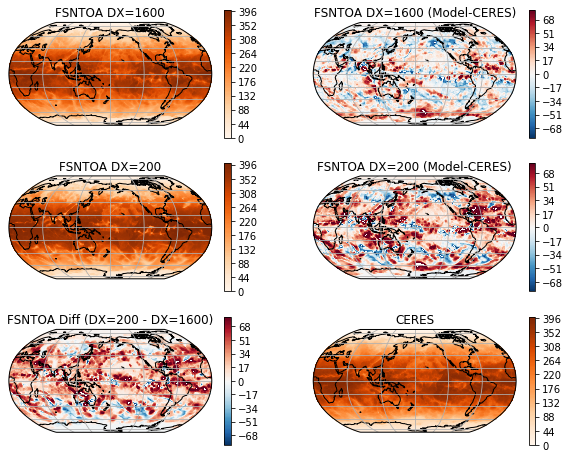

In [14]:
# Compare the FSNTOA
#-- create figure and axes object
fig = plt.figure(figsize=(10,8))
levels = np.linspace(0, 400, 101)
levels2 = np.linspace(-80.0, 80.0, 161)

#-- add coastlines, country border lines, and grid lines
ax1 = fig.add_subplot(3,2,1, projection=ccrs.Robinson(central_longitude=180.0))
#-- choose map projection
ax1.set_global()
ax1.coastlines()
ax1.gridlines()
cntr1=ax1.contourf(xi, yi, FSNTOA3_mean, levels=levels, cmap="Oranges",transform=ccrs.PlateCarree(central_longitude=180.0))
fig.colorbar(cntr1, ax=ax1)
ax1.set_title('FSNTOA DX=1600')
ax12 = fig.add_subplot(3,2,2, projection=ccrs.Robinson(central_longitude=180.0))
ax12.coastlines()
ax12.gridlines()
cntr12=ax12.contourf(xi, yi, FSNTOA3_mean-fsntoa_obs_mean, levels=levels2, cmap="RdBu_r",transform=ccrs.PlateCarree(central_longitude=180.0))
fig.colorbar(cntr12, ax=ax12)
ax12.set_title('FSNTOA DX=1600 (Model-CERES)')
ax2 = fig.add_subplot(3,2,3, projection=ccrs.Robinson(central_longitude=180.0))
ax2.set_global()
#-- add coastlines, country border lines, and grid lines
ax2.coastlines()
ax2.gridlines()
cntr2=ax2.contourf(xi, yi, FSNTOA4_mean, levels=levels, cmap="Oranges",transform=ccrs.PlateCarree(central_longitude=180.0))
fig.colorbar(cntr2, ax=ax2)
ax2.set_title('FSNTOA DX=200')
ax22 = fig.add_subplot(3,2,4, projection=ccrs.Robinson(central_longitude=180.0))
ax22.coastlines()
ax22.gridlines()
cntr22=ax22.contourf(xi, yi, FSNTOA4_mean-fsntoa_obs_mean, levels=levels2, cmap="RdBu_r",transform=ccrs.PlateCarree(central_longitude=180.0))
fig.colorbar(cntr22, ax=ax22)
ax22.set_title('FSNTOA DX=200 (Model-CERES)')
ax3 = fig.add_subplot(3,2,5, projection=ccrs.Robinson(central_longitude=180.0))
ax3.set_global()
#-- add coastlines, country border lines, and grid lines
ax3.coastlines()
ax3.gridlines()
cntr3=ax3.contourf(xi, yi, FSNTOA4_mean-FSNTOA3_mean, levels=levels2, cmap="RdBu_r",transform=ccrs.PlateCarree(central_longitude=180.0))
fig.colorbar(cntr3, ax=ax3)
ax3.set_title('FSNTOA Diff (DX=200 - DX=1600)')
ax32 = fig.add_subplot(3,2,6, projection=ccrs.Robinson(central_longitude=180.0))
ax32.coastlines()
ax32.gridlines()
cntr32=ax32.contourf(xi, yi, fsntoa_obs_mean, levels=levels, cmap="Oranges",transform=ccrs.PlateCarree(central_longitude=180.0))
fig.colorbar(cntr32, ax=ax32)
ax32.set_title('CERES')
plt.show()